# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(n):
    """
    Function that simulates rolling a dice n times.
    Return a dataframe with the n results
    """
    return pd.DataFrame(np.random.randint(1, high=7, size=n), columns=['Result'])

#### 2.- Plot the results sorted by value.

In [3]:
# your code here
simulation = dice(10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb54445cf8>]],
      dtype=object)

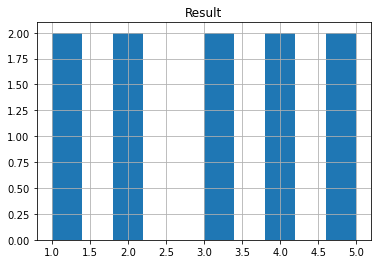

In [4]:
simulation.sort_values('Result').hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

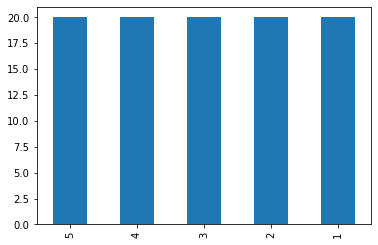

In [5]:
# your code here
(simulation['Result'].value_counts()/len(simulation['Result'])*100).T.plot(kind='bar')

In [6]:
"""
The results are very similar. The first plot returns the number of times each value is given and the second the percentage for each value
"""

'\nThe results are very similar. The first plot returns the number of times each value is given and the second the percentage for each value\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(DataFrameColumn):
    """
    Takes the values of a column from a data frame and calculates the mean
    """
    lst=DataFrameColumn.to_list()
    return sum(lst)/len(lst)

In [8]:
mean(simulation['Result'])

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
freq_dis = simulation['Result'].value_counts()/len(simulation['Result'])
val_freq = list(zip(freq_dis.index, freq_dis.values))
mean_2 = sum([x * y for x, y in val_freq])
mean_2

3.0000000000000004

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
simulation.sort_values('Result')['Result'].to_list()
a = sorted(simulation['Result'].to_list())
a


[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]

In [11]:
# your code here
def median(DataFrameColumn):
    """
    Takes the values of a column from a data frame and calculates the median
    """
    lst=sorted(DataFrameColumn.to_list())
    if len(lst)%2 == 0:
        return ((lst[len(lst)//2] + lst[(len(lst)//2)-1]) / 2)
    else:
        return lst[len(lst)//2]

In [12]:
median(simulation['Result'])

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here
def quartiles(DataFrameColumn):
    """
    Takes the values of a column from a data frame and calculates the quartiles
    """
    lst=sorted(DataFrameColumn.to_list())
    long = len(lst)
    if long%2 == 0:
        q1 = (lst[long//4] + lst[(long//4)-1]) / 2
        q2 = (lst[long//2] + lst[(long//2)-1]) / 2
        q3 = (lst[(long*3)//4] + lst[((long*3)//4)-1]) / 2
        q4 = lst[long-1]
        print(f'Quartile 25% = {q1}')
        print(f'Quartile 50% = {q2}')
        print(f'Quartile 75% = {q3}')
        print(f'Quartile 100% = {q4}')
        return q1, q2, q3, q4
        
    else:
        q1 = lst[long//4]
        q2 = lst[long//2]
        q3 = lst[(long*3)//4]
        q4 = lst[long-1]
        print(f'Quartile 25% = {q1}')
        print(f'Quartile 50% = {q2}')
        print(f'Quartile 75% = {q3}')
        print(f'Quartile 100% = {q4}')
        return q1, q2, q3, q4
        
        

In [14]:
quartiles(simulation['Result'])


Quartile 25% = 1.5
Quartile 50% = 3.0
Quartile 75% = 4.0
Quartile 100% = 5


(1.5, 3.0, 4.0, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [15]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


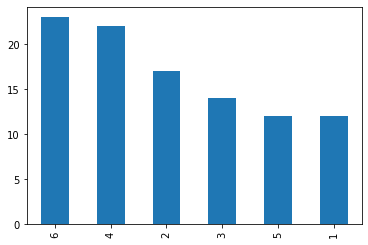

In [16]:
data['value'].value_counts().plot(kind='bar')
plt.show()

In [17]:
"""
The frequency of the values are differents. The dice may be cheated
"""

'\nThe frequency of the values are differents. The dice may be cheated\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
# your code here
mean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [19]:
# your code here
freq_dis = data['value'].value_counts()/len(data['value'])
freq_dis
# val_freq = list(zip(freq_dis.index, freq_dis.values))
# mean_2 = sum([x * y for x, y in val_freq])
# mean_2

6    0.23
4    0.22
2    0.17
3    0.14
5    0.12
1    0.12
Name: value, dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

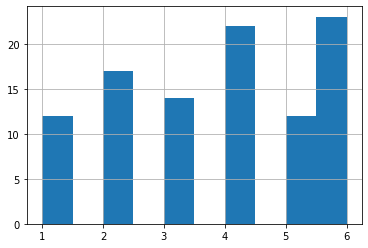

In [20]:
# your code here
data['value'].hist()
plt.show()

In [21]:
"""
Differences between each value. It should be flatter
"""

'\nDifferences between each value. It should be flatter\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

3    0.175
1    0.175
4    0.168
2    0.167
6    0.166
5    0.149
Name: value, dtype: float64


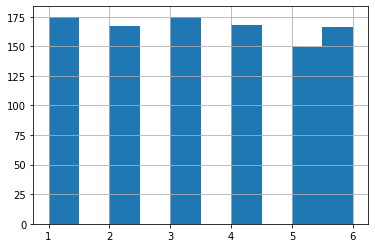

In [22]:
# your code here
data1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
freq_dis = data1000['value'].value_counts()/len(data1000['value'])
print(freq_dis)
data1000['value'].hist()
plt.show()

In [23]:
"""
The values now are very similar. We can conclude the dice is kindly fair, but not perfect.
"""

'\nThe values now are very similar. We can conclude the dice is kindly fair, but not perfect.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [24]:
# your code here
age = pd.read_csv('../data/ages_population.csv')
age.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


39.0    0.045
41.0    0.036
30.0    0.034
35.0    0.033
43.0    0.032
42.0    0.032
36.0    0.031
38.0    0.030
32.0    0.030
37.0    0.030
34.0    0.029
45.0    0.029
40.0    0.027
29.0    0.026
27.0    0.025
31.0    0.024
46.0    0.023
44.0    0.023
26.0    0.023
33.0    0.022
28.0    0.020
25.0    0.019
49.0    0.019
48.0    0.019
24.0    0.018
47.0    0.017
23.0    0.017
22.0    0.016
50.0    0.016
56.0    0.015
        ...  
16.0    0.008
59.0    0.008
18.0    0.007
58.0    0.007
63.0    0.007
57.0    0.007
13.0    0.006
8.0     0.005
60.0    0.004
67.0    0.004
62.0    0.004
68.0    0.003
66.0    0.003
11.0    0.003
10.0    0.003
61.0    0.002
9.0     0.002
5.0     0.002
6.0     0.002
65.0    0.002
2.0     0.002
1.0     0.002
64.0    0.002
4.0     0.001
82.0    0.001
70.0    0.001
71.0    0.001
7.0     0.001
69.0    0.001
73.0    0.001
Name: observation, Length: 72, dtype: float64


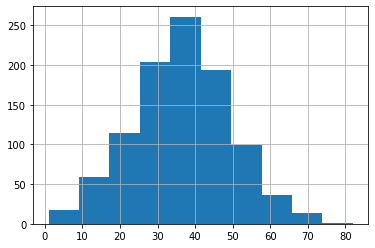

In [25]:
freq_dis = age['observation'].value_counts()/len(age['observation'])
print(freq_dis)
age['observation'].hist()
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [26]:
# your code here
age_mean = mean(age['observation'])
print(f'mean = {age_mean}')
std_dev = np.std(age['observation'])
print(f'standard deviation = {std_dev}')

mean = 36.56
standard deviation = 12.810089773299795


In [27]:
"""
The mean yes, but not the standard deviation
"""

'\nThe mean yes, but not the standard deviation\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [28]:
# your code here
age2 = pd.read_csv('../data/ages_population2.csv')
age2.tail()

,observation
995,26.0
996,22.0
997,21.0
998,19.0
999,28.0


28.0    0.139
27.0    0.125
26.0    0.120
29.0    0.115
25.0    0.098
30.0    0.090
24.0    0.078
31.0    0.061
23.0    0.041
22.0    0.035
32.0    0.031
33.0    0.022
21.0    0.017
20.0    0.013
34.0    0.007
35.0    0.003
19.0    0.003
36.0    0.002
Name: observation, dtype: float64


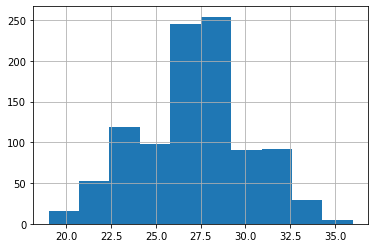

In [29]:
freq_dis = age2['observation'].value_counts()/len(age2['observation'])
print(freq_dis)
age2['observation'].hist()
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [30]:
"""
The frequency distribution is very similar, but not the ages. Now we have from 19 to 36 years old people.
"""

'\nThe frequency distribution is very similar, but not the ages. Now we have from 19 to 36 years old people.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [31]:
# your code here
age2_mean = mean(age2['observation'])
print(f'mean = {age2_mean}')
std_dev2 = np.std(age2['observation'])
print(f'standard deviation = {std_dev2}')

mean = 27.155
standard deviation = 2.9683286543103677


In [32]:
"""
Now the standard deviation is much more lower because all the range of ages is closer
"""

'\nNow the standard deviation is much more lower because all the range of ages is closer\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [33]:
# your code here
age3 = pd.read_csv('../data/ages_population3.csv')
age3.tail()

,observation
995,16.0
996,55.0
997,30.0
998,35.0
999,43.0


32.0    0.037
35.0    0.031
37.0    0.031
39.0    0.029
36.0    0.026
41.0    0.025
38.0    0.025
48.0    0.025
29.0    0.025
30.0    0.024
45.0    0.024
46.0    0.022
43.0    0.022
67.0    0.022
50.0    0.021
40.0    0.021
31.0    0.021
34.0    0.020
70.0    0.019
27.0    0.019
66.0    0.019
24.0    0.019
49.0    0.018
28.0    0.018
25.0    0.017
33.0    0.017
68.0    0.017
44.0    0.017
69.0    0.017
52.0    0.017
        ...  
56.0    0.010
17.0    0.010
54.0    0.009
16.0    0.009
18.0    0.009
57.0    0.008
59.0    0.008
15.0    0.008
72.0    0.008
58.0    0.006
73.0    0.006
61.0    0.006
74.0    0.006
60.0    0.006
14.0    0.005
12.0    0.004
62.0    0.003
11.0    0.002
77.0    0.002
4.0     0.002
13.0    0.002
75.0    0.002
10.0    0.002
2.0     0.002
8.0     0.001
76.0    0.001
9.0     0.001
1.0     0.001
5.0     0.001
7.0     0.001
Name: observation, Length: 75, dtype: float64


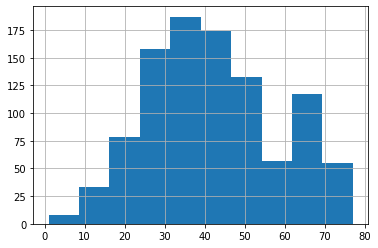

In [34]:
freq_dis = age3['observation'].value_counts()/len(age3['observation'])
print(freq_dis)
age3['observation'].hist()
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [35]:
# your code here
age3_mean = mean(age3['observation'])
print(f'mean = {age3_mean}')
std_dev3 = np.std(age3['observation'])
print(f'standard deviation = {std_dev3}')

mean = 41.989
standard deviation = 16.13663158778808


In [36]:
"""
Now there are more older people, and the standard deviation increases
"""

'\nNow there are more older people, and the standard deviation increases\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [37]:
# your code here
print('Quartiles of ages_population3.csv')
quartiles(age3['observation'])
print(f'mean = {age3_mean}')

Quartiles of ages_population3.csv
Quartile 25% = 30.0
Quartile 50% = 40.0
Quartile 75% = 53.0
Quartile 100% = 77.0
mean = 41.989


In [38]:
"""
As there are more older people, the mean is higher than the median
"""

'\nAs there are more older people, the mean is higher than the median\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [39]:
# your code here
print('Quartiles of ages_population.csv')
quartiles(age['observation'])
print(f'mean = {age_mean}')

Quartiles of ages_population.csv
Quartile 25% = 28.0
Quartile 50% = 37.0
Quartile 75% = 45.0
Quartile 100% = 82.0
mean = 36.56


In [40]:
"""
With the percentiles of ages_population.csv we see that the values are lower and the mean is close to the 
median beacause ot the equitable distribution of the data
"""

'\nWith the percentiles of ages_population.csv we see that the values are lower and the mean is close to the \nmedian beacause ot the equitable distribution of the data\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [41]:
# your code here

In [42]:
"""
your comments here
"""

'\nyour comments here\n'